# Web Scraping with lazy load

Page to be scraped: El Espectador

In [252]:
# Importing required libraries

import time

from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from pymongo import TEXT

from pymongo import MongoClient

In [242]:
# Creating a connection to MongoDB
client = MongoClient('localhost', 27017)
db = client['news1']
collection = db['elespectador']

In [3]:
# Base URL of the site to be analyzed
SITE_URL = 'https://www.elespectador.com'

In [147]:
# Firefox web driver path
# Download the driver for you S.O. here: https://github.com/mozilla/geckodriver/releases
DRIVER_PATH = './geckodriver-v0.31.0-win64/geckodriver.exe'

In [238]:
# Creating a new Edge window
browser = webdriver.Firefox(executable_path = DRIVER_PATH)

C:\Users\lsofi\AppData\Local\Temp\ipykernel_12808\851349788.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Firefox(executable_path = DRIVER_PATH)


In [206]:
def make_request(browser, relative_path):
    # Making the request and rendering the browser
    browser.get(SITE_URL + relative_path)
    
    # Simulating vertical scrolling for handling lazy load
    check_height = browser.execute_script('return document.body.scrollHeight;')
    while True:
        browser.execute_script('window.scrollBy(0, 600);')
        time.sleep(6)
        height = browser.execute_script('return document.body.scrollHeight;')
        if height == check_height: 
            break 
        check_height = height
    
    # Getting HTML content and passing it to BeautifulSoup for scraping analysis
    return BeautifulSoup(browser.page_source, 'html.parser')

In [207]:

def cardsTotal(soup, cards):
    i=0
    # Finding the section where news are contained 
    layout = soup.find(class_ = 'Layout-flexAds')
    # Getting blocks from layout
    blocks = layout.find_all(class_ = 'Container Block', recursive = True)
    while i<len(blocks):
        # Finding and concatenating news cards
        cards += blocks[i].find_all(class_ = 'Card_rowCardLeft') 
        i+=1
    return(cards)

In [219]:
# Getting HTML content for a particular news listing page
#Politica
cardsPoli=[]
cardsCol=[]
cardsJud=[]
cardsEco=[]
cardsEdu=[]

#Se llena un arreglo con la informacion de cada card
poli = make_request(browser, '/archivo/politica/')
cardsTotal(poli, cardsPoli)
j=2
while j<6:
    poli = make_request(browser, f'/archivo/politica/{j}/')
    cardsTotal(poli, cardsPoli)
    j+=1

#Colombia
col = make_request(browser, '/archivo/colombia/')
cardsTotal(col, cardsCol)
j=2
while j<6:
    poli = make_request(browser, f'/archivo/colombia/{j}/')
    cardsTotal(col, cardsCol)
    j+=1

#Judicial
jud = make_request(browser, '/archivo/judicial/')
cardsTotal(jud, cardsJud)
j=2
while j<6:
    poli = make_request(browser, f'/archivo/judicial/{j}/')
    cardsTotal(jud, cardsJud)
    j+=1

#Economia
eco = make_request(browser, '/archivo/economia/')
cardsTotal(eco, cardsEco)
j=2
while j<6:
    poli = make_request(browser, f'/archivo/economia/{j}/')
    cardsTotal(eco, cardsEco)
    j+=1

#Educacion
edu = make_request(browser, '/archivo/educacion/')
cardsTotal(edu, cardsEdu)
j=2
while j<6:
    poli = make_request(browser, f'/archivo/educacion/{j}/')
    cardsTotal(edu, cardsEdu)
    j+=1



In [220]:
print(len(cardsPoli))
print(len(cardsCol))
print(len(cardsJud))
print(len(cardsEco))
print(len(cardsEdu))

56
40
40
40
40


In [221]:
# Building a list with title and relative path of the news founded
news = []

for card in cardsPoli:
    news.append({
        'title': card.find('h2', class_ = 'Card-Title').find('a').get_text(),
        'relative_path': card.find('h2', class_ = 'Card-Title').find('a')['href'],
        'cathegory':"Politica"
    })

for card in cardsCol:
    news.append({
        'title': card.find('h2', class_ = 'Card-Title').find('a').get_text(),
        'relative_path': card.find('h2', class_ = 'Card-Title').find('a')['href'],
        'cathegory':"Colombia"
    })
    
for card in cardsJud:
    news.append({
        'title': card.find('h2', class_ = 'Card-Title').find('a').get_text(),
        'relative_path': card.find('h2', class_ = 'Card-Title').find('a')['href'],
        'cathegory':"Judicial"
    })
    
for card in cardsEco:
    news.append({
        'title': card.find('h2', class_ = 'Card-Title').find('a').get_text(),
        'relative_path': card.find('h2', class_ = 'Card-Title').find('a')['href'],
        'cathegory':"Economia"
    })
    
for card in cardsEdu:
    news.append({
        'title': card.find('h2', class_ = 'Card-Title').find('a').get_text(),
        'relative_path': card.find('h2', class_ = 'Card-Title').find('a')['href'],
        'cathegory':"Educacion"
    })

In [222]:
news

[{'title': 'Presidente Iván Duque se va en contra de Rusia en el Consejo de Seguridad',
  'relative_path': '/politica/presidente-ivan-duque-se-va-en-contra-de-rusia-en-el-consejo-de-seguridad/',
  'cathegory': 'Politica'},
 {'title': '“No hay enemigos de la paz en la institucionalidad”: Duque al Consejo de Seguridad',
  'relative_path': '/politica/no-hay-enemigos-de-la-paz-en-la-institucionalidad-duque-al-consejo-de-seguridad/',
  'cathegory': 'Politica'},
 {'title': '“Hay un discurso de inclusión de mujeres, pero en la práctica no hay congruencia”',
  'relative_path': '/politica/elecciones-colombia-2022/hay-un-discurso-de-inclusion-de-mujeres-pero-en-la-practica-no-hay-congruencia-transparencia-por-colombia/',
  'cathegory': 'Politica'},
 {'title': 'Registrador confirma diferencia de un millón de votos entre preconteo y escrutinio',
  'relative_path': '/politica/elecciones-colombia-2022/registrador-confirma-diferencia-de-un-millon-de-votos-entre-preconteo-y-escrutinio/',
  'cathegory'

In [223]:

for n in news:
    # Getting HTML content for each news page
    soup = make_request(browser, n['relative_path'])
    
    # Extracting news metadata
    n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
    n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()
    
    # Extracting and concatenating news full text
    paragraphs = soup.find_all(class_ = 'font--secondary')
    n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

TimeoutException: Message: TimedPromise timed out after 300000 ms
Stacktrace:
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:183:5
TimeoutError@chrome://remote/content/shared/webdriver/Errors.jsm:472:5
bail@chrome://remote/content/marionette/sync.js:227:19


In [ ]:
for n in reversed(news):
    if n==news[160]:
        break
    else:
        # Getting HTML content for each news page
        soup = make_request(browser, n['relative_path'])

        # Extracting news metadata
        n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
        n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()

        # Extracting and concatenating news full text
        paragraphs = soup.find_all(class_ = 'font--secondary')
        n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

In [240]:
news

[{'title': 'Presidente Iván Duque se va en contra de Rusia en el Consejo de Seguridad',
  'relative_path': '/politica/presidente-ivan-duque-se-va-en-contra-de-rusia-en-el-consejo-de-seguridad/',
  'cathegory': 'Politica',
  'datetime': '12 abr. 2022  - 12:31 p.\xa0m.',
  'summary': 'El primer mandatario respondió de forma fuerte ante las duras críticas de la delegación rusa a la implementación del acuerdo de paz.',
  'full_text': 'Este martes se llevó a cabo una nueva sesión de Consejo de Seguridad de las Naciones Unidas para presentar el informe trimestral de la implementación del acuerdo de paz. En esta ocasión se contó con la presencia especial del presidente Iván Duque, que usó el espacio para hacer un cierre de cuentas de su política de Paz con Legalidad, que la mostró como su forma de llevar a cabo la implementación. Durante la sesión, delegaciones a nivel mundial expresaron algunas de sus preocupaciones por la implementación. Uno de los más críticos fue el representante de la Fe

In [244]:
# Storing extracted information for further analysis
collection.insert_many(news)

In [253]:
collection.create_index([('title', TEXT),('summary', TEXT),('full_text', TEXT)],default_language='spanish')

'title_text_summary_text_full_text_text'

In [255]:
result_search=list(collection.find({'$text': {'$search': 'elecciones presidenciales'}}, {'_id':0, 'summary':1, 'title':1, 'full_text':1, 'score':{'$meta':"textScore"}}))

In [256]:
len(result_search)

40

In [ ]:
result_search

[{'title': '“Daniel Quintero es un líder”: Lucas Cañas Jaramillo',
  'summary': 'El presidente del Concejo de Medellín reafirma su defensa a la gestión del alcalde y pide armonía entre la institucionalidad, el empresariado, las universidades y otros sectores, para que la ciudad avance y siga por buen camino. “Todos estamos del mismo lado, todos queremos y amamos a Medellín”, dice.',
  'full_text': 'Nunca en la historia de Medellín se había presentado tanta controversia en torno a su alcalde como hoy. Pero más sui géneris es lo que pasó con el actual presidente del Concejo, Lucas Cañas Jaramillo, quien a pesar de haberse ‘quemado’ en 2019, en la lista del Partido Conservador, logró llegar a la corporación a raíz de una decisión del Consejo de Estado, que anuló la elección de quien quedó por encima de él en la votación. Hoy, Cañas Jaramillo rige los destinos del cabildo de la capital antioqueña y es uno de los aliados del alcalde Daniel Quintero. Lucas Cañas Jaramillo es hijo del reconoc

In [267]:
!pip install -U spacy
!python -m spacy download es_core_news_md

     ---------------------------------------- 43.4/43.4 MB 6.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [264]:
!pip install wordcloud

In [282]:
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md
import matplotlib.pyplot as plt
%matplotlib inline


In [284]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [269]:
nlp = es_core_news_md.load()

In [270]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["news1"]
collection = db["elespectador"]

In [273]:
text = []
for news1 in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])

In [274]:
text = " ".join(text)

In [275]:
text

'El paisaje urbano del centro de Bogotá estrena obra de arte de Carlos Curz-Diez Se trata del Anillo de Inducción cromática, implantado en la plazoleta principal de la Universidad Jorge Tadeo Lozano y que fue inaugurada el pasado jueves 31 de marzo. Con el suelo como lienzo y concebida especialmente para los espacios públicos de la Universidad de Bogotá Jorge Tadeo Lozano, la obra de Carlos Cruz-Diez, Anillo de Inducción Cromática, entró a hacer parte del paisaje urbano de Bogotá este jueves 31 de marzo. En un evento de inauguración, en el que participó el rector de la institución, Carlos Sánchez Gaitán, el presidente del Consejo Directivo, Jaime Pinzón López y el hijo del fallecido artista y autor de la obra, Carlos Cruz-Diez Delgado. Asimismo, estudiantes, artistas musicales y miembros importantes de la institución fueron testigos del resultado de un trabajo de casi 17 años, al exponer el Anillo de Inducción Cromática. Esta es una obra circular integrada a nivel de la superficie, de 

In [277]:
words = word_tokenize(text)

In [278]:
words[:10]

['El',
 'paisaje',
 'urbano',
 'del',
 'centro',
 'de',
 'Bogotá',
 'estrena',
 'obra',
 'de']

In [279]:
frec_dist=FreqDist(words)

In [280]:
frec_dist.most_common(10)

[('de', 17280),
 (',', 12528),
 ('la', 10584),
 ('y', 7128),
 ('el', 6264),
 ('.', 6048),
 ('en', 5616),
 ('que', 5184),
 ('del', 4104),
 ('obra', 3024)]

In [285]:
stop_words = set(stopwords.words("spanish"))

In [286]:
stop_words


{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [287]:
# Removing stop words
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)

In [288]:
# Words distribution for text without stopwords
frec_dist_filtered = FreqDist(filtered_words)

In [289]:
# Printing the most common words
frec_dist_filtered.most_common(10)

[(',', 12528),
 ('.', 6048),
 ('obra', 3024),
 ('Carlos', 1944),
 ('Bogotá', 1512),
 ('arte', 1296),
 ('urbano', 1080),
 ('Anillo', 1080),
 ('Inducción', 1080),
 ('Cruz-Diez', 1080)]

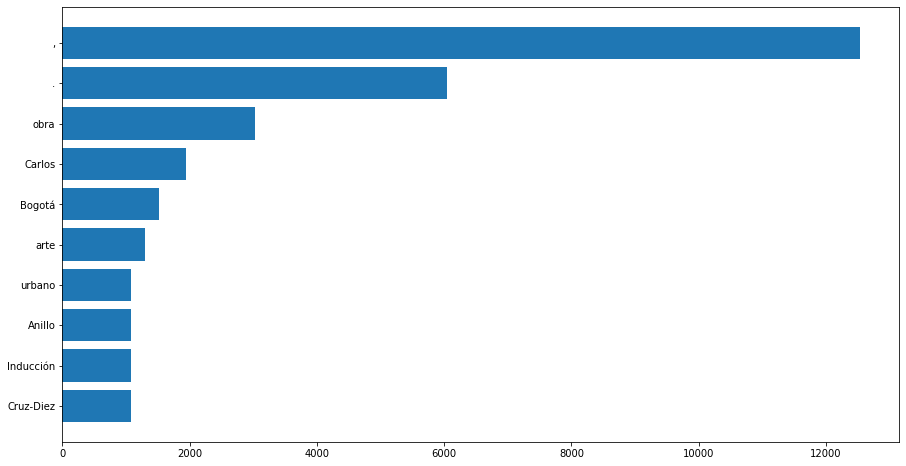

In [290]:
# Plotting a bar char for frecuencies
n = 10

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist_filtered.most_common(n) ], [ w[1] for w in frec_dist_filtered.most_common(n) ])
plt.gca().invert_yaxis()

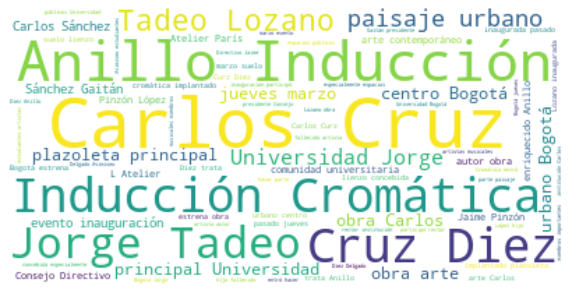

In [294]:
# Creating the wordcloud without stopwords
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(" ".join(filtered_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [297]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"

In [298]:
# Part of Speech (PoS)
# Model optimized for spanish: https://nlp.stanford.edu/software/
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf8")
pos_tags = pos_tagger.tag(filtered_words)

In [299]:
pos_tags.sort(key = lambda tup: tup[1])
pos_tags

[('urbano', 'ADJ'),
 ('cromática', 'ADJ'),
 ('implantado', 'ADJ'),
 ('principal', 'ADJ'),
 ('inaugurada', 'ADJ'),
 ('pasado', 'ADJ'),
 ('concebida', 'ADJ'),
 ('públicos', 'ADJ'),
 ('urbano', 'ADJ'),
 ('rector', 'ADJ'),
 ('fallecido', 'ADJ'),
 ('artista', 'ADJ'),
 ('musicales', 'ADJ'),
 ('importantes', 'ADJ'),
 ('integrada', 'ADJ'),
 ('ancho', 'ADJ'),
 ('distintas', 'ADJ'),
 ('cromáticas', 'ADJ'),
 ('luminosa', 'ADJ'),
 ('ángulo', 'ADJ'),
 ('virtuales', 'ADJ'),
 ('reales', 'ADJ'),
 ('aplicados', 'ADJ'),
 ('elaboradas', 'ADJ'),
 ('francesa', 'ADJ'),
 ('pandemia', 'ADJ'),
 ('óptica', 'ADJ'),
 ('universitario', 'ADJ'),
 ('capital', 'ADJ'),
 ('perseveramos', 'ADJ'),
 ('propicios', 'ADJ'),
 ('vibrantes', 'ADJ'),
 ('breve', 'ADJ'),
 ('urbana', 'ADJ'),
 ('directivos', 'ADJ'),
 ('principal', 'ADJ'),
 ('particulares', 'ADJ'),
 ('posgrados', 'ADJ'),
 ('abierta', 'ADJ'),
 ('abriéndole', 'ADJ'),
 ('peatonales', 'ADJ'),
 ('apropiada', 'ADJ'),
 ('solo', 'ADJ'),
 ('general', 'ADJ'),
 ('venezolano', 'A

In [300]:
len(pos_tags)

128952

In [304]:
pos_tags[-100:]

[('adquieren', 'VERB'),
 ('expresó', 'VERB'),
 ('dijo', 'VERB'),
 ('formalizó', 'VERB'),
 ('espera', 'VERB'),
 ('convierta', 'VERB'),
 ('Queremos', 'VERB'),
 ('vean', 'VERB'),
 ('verá', 'VERB'),
 ('haberme', 'VERB'),
 ('representar', 'VERB'),
 ('concluyó', 'VERB'),
 ('Cabe', 'VERB'),
 ('resaltar', 'VERB'),
 ('sitúan', 'VERB'),
 ('trabajo', 'VERB'),
 ('aportado', 'VERB'),
 ('ampliando', 'VERB'),
 ('forman', 'VERB'),
 ('partir', 'VERB'),
 ('verá', 'VERB'),
 ('culminó', 'VERB'),
 ('encargaron', 'VERB'),
 ('darle', 'VERB'),
 ('disfrutaban', 'VERB'),
 ('pertenece', 'VERB'),
 ('estrena', 'VERB'),
 ('trata', 'VERB'),
 ('entró', 'VERB'),
 ('hacer', 'VERB'),
 ('participó', 'VERB'),
 ('exponer', 'VERB'),
 ('circular', 'VERB'),
 ('aparecen', 'VERB'),
 ('desaparecen', 'VERB'),
 ('dependiendo', 'VERB'),
 ('recorrer', 'VERB'),
 ('surgiendo', 'VERB'),
 ('abrió', 'VERB'),
 ('asegurando', 'VERB'),
 ('logó', 'VERB'),
 ('culminar', 'VERB'),
 ('concuerda', 'VERB'),
 ('extender', 'VERB'),
 ('perfeccionar',

In [302]:
# Named Entity Recognition (NER)
document = nlp(text)
displacy.render(document, style = "ent")



ValueError: [E088] Text of length 1246967 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [306]:
textPart1 = text[:len(text)//2]
textPart2 = text[len(text)//2:]

In [307]:
# Named Entity Recognition (NER)
document = nlp(textPart1)
displacy.render(document, style = "ent")

In [308]:
# Named Entity Recognition (NER)
document = nlp(textPart2)
displacy.render(document, style = "ent")